## Using features extracted from intensity profiles


In [ ]:
!pip install adjustText

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.manifold import TSNE
from adjustText import adjust_text

In [ ]:
import matplotlib.pylab as pylab
params = {
    'font.size': 12,
    'legend.fontsize':'large',
    'figure.titlesize':'large',
    'axes.grid':False,
    'axes.labelsize':'large',
    'axes.titlesize':'large',
    'xtick.labelsize':'large',
    'ytick.labelsize':'large',
    #'figure.figsize': (5, 6)
    }
pylab.rcParams.update(params)

In [ ]:
def plot_helper(scaled_data_transformed, x_index=0, y_index=1, title='', data=''):
    fig, ax = plt.subplots(figsize=(6, 6))
    # Define color and marker mapping
    if data == 'experiment': # plaques 1-8
        marker_map = {
            range(0, 20): ('*', 'black'),
            range(20, 34): ('o', 'blue'),
            range(34, 49): ('<', 'green'),
            range(49, 73): ('D', 'red'),
            range(73, 86): ('X', 'cyan'),
            range(86, 94): ('s', 'magenta'),
            range(94, 117): ('^', 'gray'),
            range(117, len(scaled_data_transformed)): ('p', 'purple')
        }
        round_one_cells = [0, 20, 34, 49, 73, 86, 94, 117]
    elif data == 'toy-similar': # similar toy data
        marker_map = {
            range(0, 10): ('*', 'black'),
            range(10, 20): ('o', 'blue'),
            range(20, 30): ('<', 'green'),
            range(30, 40): ('D', 'red')
        }
        round_one_cells = [0, 10, 20, 30]
    elif data =='toy-dissimilar': # dissimilar toy data
        marker_map = {
            range(0, 11): ('*', 'black'),
            range(11, 24): ('o', 'blue'),
            range(24, 31): ('<', 'green'),
            range(31, 37): ('D', 'red'),
            range(37, 47): ('X', 'cyan'),
            range(47, 56): ('s', 'magenta'),
        }
        round_one_cells = [0, 11, 24, 31, 37, 47]

    legend_scatter = []
    legend_labels = []

    # Scatter plot with markers and colors based on the marker map
    for i, (index_range, (marker, color)) in enumerate(marker_map.items()):
        indices = index_range
        ax.scatter(scaled_data_transformed[indices, x_index], scaled_data_transformed[indices, y_index], marker=marker, c=color, s=50, alpha=0.75)
        legend_scatter.append(ax.scatter([], [], marker=marker, c=color, label=f'Plaque {i+1}'))
        legend_labels.append(f'Plaque {i+1}')

    texts = []

    for round_one_cell in round_one_cells:
        ax.scatter(scaled_data_transformed[round_one_cell, x_index], scaled_data_transformed[round_one_cell, y_index], s=100, facecolors='none', edgecolors='k')
        # ax.annotate(f'P{round_one_cells.index(round_one_cell)+1}C1',
        #             (scaled_data_transformed[round_one_cell, x_index], scaled_data_transformed[round_one_cell, y_index]),
        #             ha='center', va='top', size='medium')
        text = ax.annotate(f'P{round_one_cells.index(round_one_cell)+1}C1',
                                (scaled_data_transformed[round_one_cell, x_index], scaled_data_transformed[round_one_cell, y_index]),
                                ha='center', va='top', size='medium')
        texts.append(text)
    adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, expand=(1.2, 2), arrowprops=dict(arrowstyle="->", color='k', lw=1.))

    #ax.legend(handles=legend_scatter, labels=legend_labels, bbox_to_anchor=(1.25, 0.75))
    ax.set_xlabel(f'Dimension {x_index+1}')
    ax.set_ylabel(f'Dimension {y_index+1}')
    ax.set_title(title)

    plt.tight_layout()
    plt.legend()
    plt.show()
    # return fig

Perplexity: 5, Shape: (153, 2)


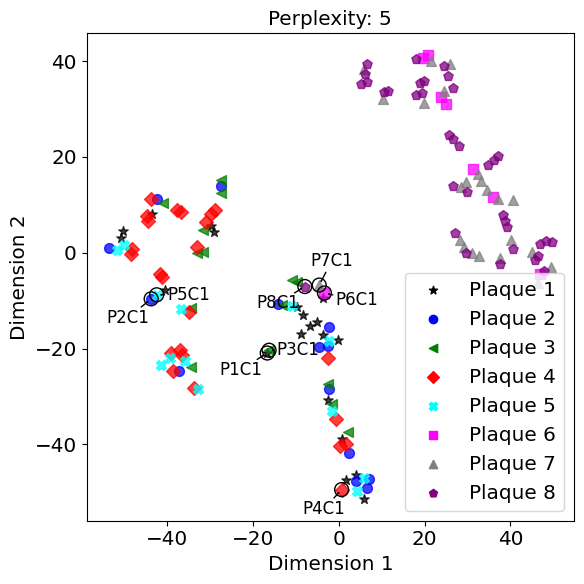

Perplexity: 8, Shape: (153, 2)


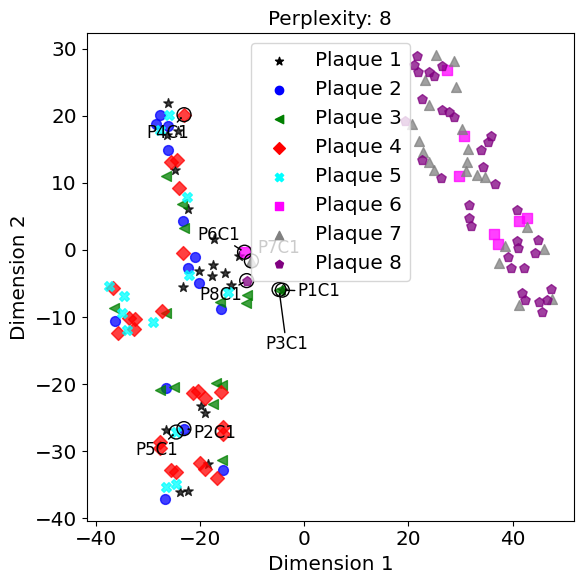

Perplexity: 10, Shape: (153, 2)


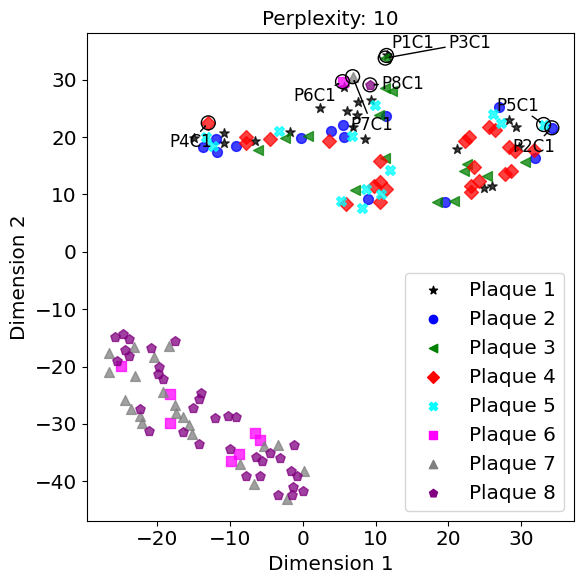

Perplexity: 15, Shape: (153, 2)


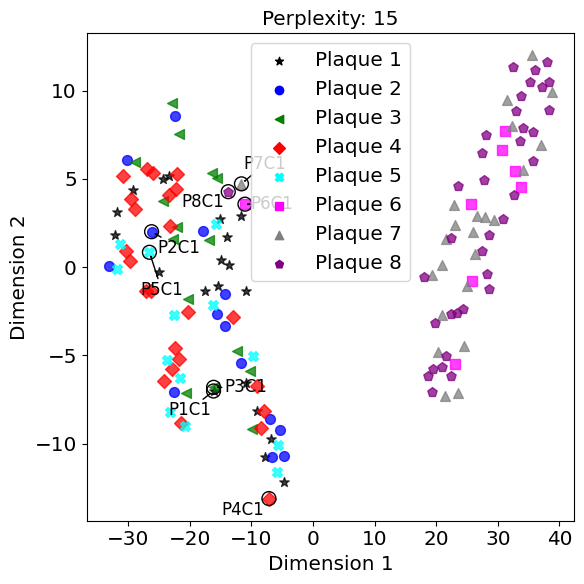

Perplexity: 20, Shape: (153, 2)


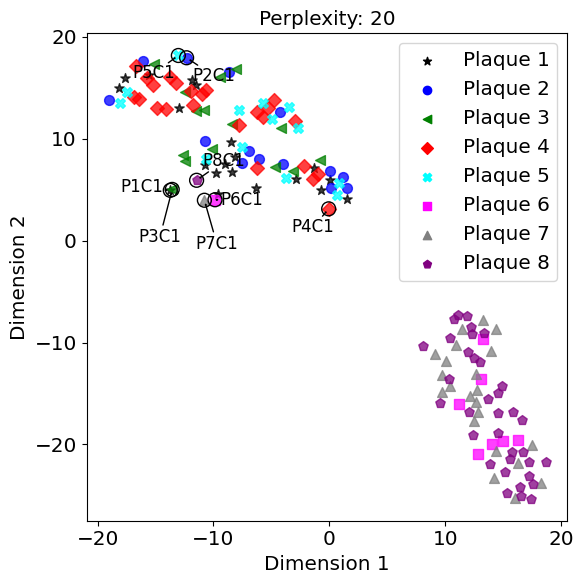

Perplexity: 25, Shape: (153, 2)


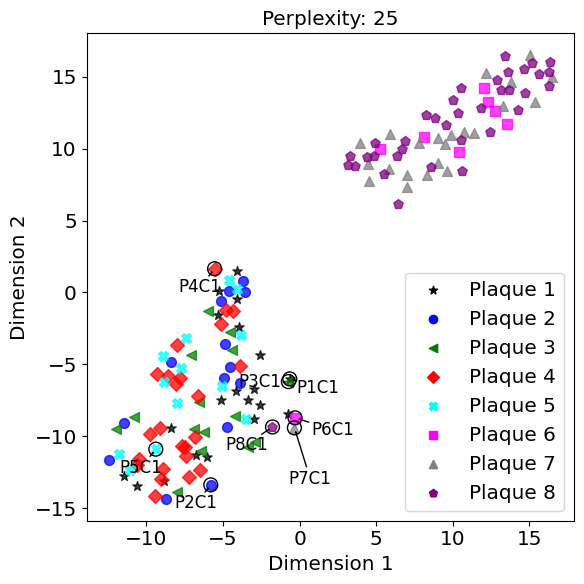

Perplexity: 30, Shape: (153, 2)


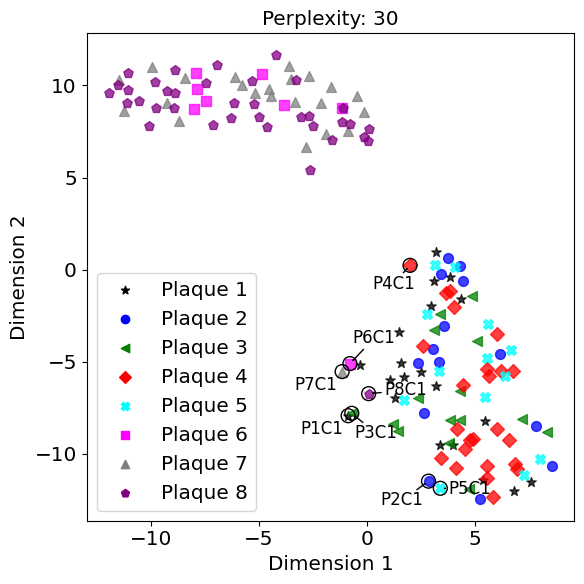

Perplexity: 35, Shape: (153, 2)


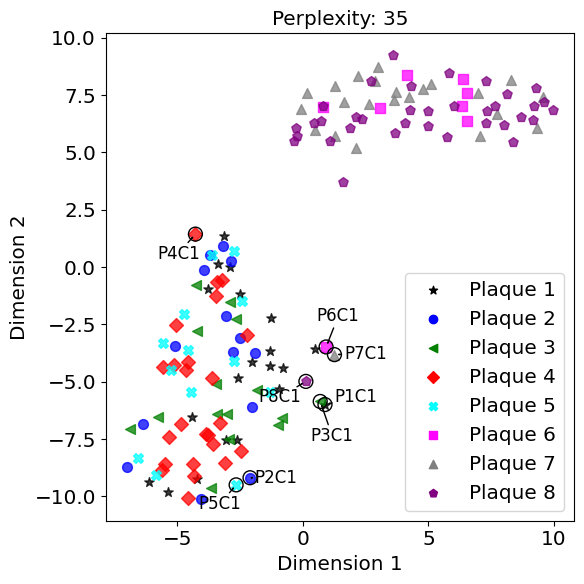

Perplexity: 40, Shape: (153, 2)


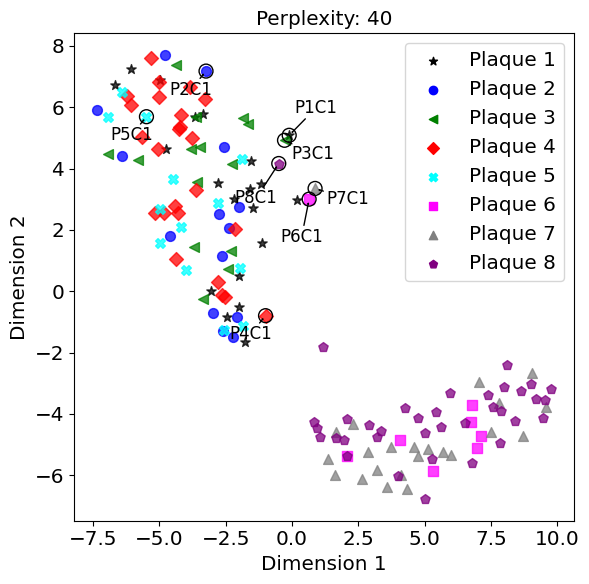

Perplexity: 45, Shape: (153, 2)


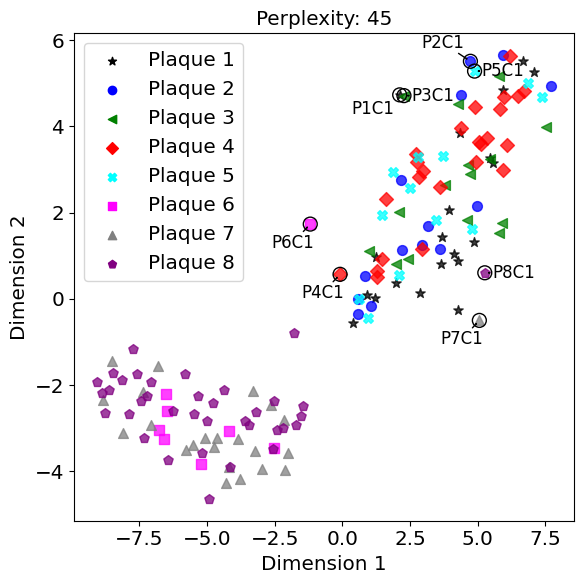

Perplexity: 50, Shape: (153, 2)


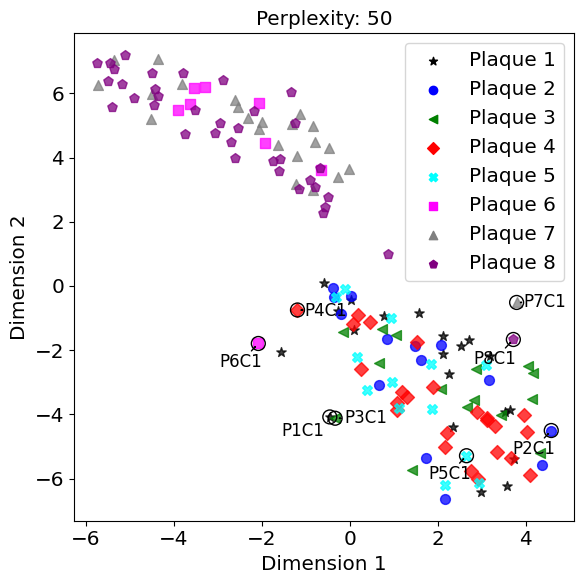

In [ ]:
file_name = 'experimental data - attributes.xlsx'
sheet_name = 'all plaques'
n_rows = 153
data = 'experiment'

# file_name = 'S1.xlsx'
# sheet_name = 'attributes'
# n_rows = 40
# data = 'toy-similar'

# file_name = 'S2.xlsx'
# sheet_name = 'attributes'
# n_rows = 40
# data = 'toy-similar'

# file_name = 'S3.xlsx'
# sheet_name = 'attributes'
# n_rows = 56
# data = 'toy-dissimilar'

attributes_df = pd.read_excel(file_name, sheet_name, nrows=n_rows)
attributes_df = attributes_df.drop(labels=['Unnamed: 0', 'Cell #', 'Plaque', 'Cell ID'], axis=1)
indices = ['GFP max', 'Infection time', 'Rise time', 'Lysis time', 'Infection duration', 'Rise rate', 'Area']
scaled_data = StandardScaler().fit_transform(attributes_df)
pd.DataFrame(scaled_data, columns=attributes_df.columns)

perplexities = [5, 8, 10, 15, 20, 25, 30, 35, 40, 45, 50]
for perplexity in perplexities:
    embedding = TSNE(n_components=2, perplexity=perplexity, method='exact', random_state=42)
    scaled_data_transformed = embedding.fit_transform(scaled_data)
    print(f'Perplexity: {perplexity}, Shape: {scaled_data_transformed.shape}')
    plot_helper(scaled_data_transformed, x_index=0, y_index=1, title=f'Perplexity: {perplexity}', data=data)